## Bribe and Voting report for bveCVX overview

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from IPython.core.display_functions import display

plt.style.use('seaborn')
from notebooks.cvx_bribes.bvecvx_data import VOTING_DATASETS

TABLE_COLUMNS = ["Voting Round", "Total bveCVX bought in $", "Total BADGER bought in $", "bveCVX bought", "BADGER bought",
                 "$/vlcvx total", "$/vlcvx pure bribes", "$/vlcvx Llama", "vlcvx difference %"]

data_rows = []
for voting_round in VOTING_DATASETS:
    llama_vlcvx = voting_round['llama_vlcvx']
    badger_vlcvx = voting_round['$/vlCVX without badgerwbtc']
    difference_with_llama = round(
        abs(badger_vlcvx - llama_vlcvx) / ((llama_vlcvx + badger_vlcvx) / 2) * 100, 3
    )
    data_rows.append([
        voting_round['round'], voting_round['total_cvx_sold_in_$'], voting_round['total_badger_sold_in_$'],
        voting_round['amount_cvx'], voting_round['amount_badger'], voting_round['$/vlCVX for total votes'],
        voting_round['$/vlCVX without badgerwbtc'], voting_round['llama_vlcvx'], difference_with_llama
    ])
data_rows.reverse()
dataframe = pd.DataFrame(data=data_rows, columns=TABLE_COLUMNS)
display(dataframe)

,Voting Round,Total bveCVX bought in $,Total BADGER bought in $,bveCVX bought,BADGER bought,$/vlcvx total,$/vlcvx pure bribes,$/vlcvx Llama,vlcvx difference %
0,13th Oct 2022,83810.609,31898.119,15855.204,9409.48,0.0455,0.050,0.04901,2.000
1,29th Sep 2022,106512.74,40568.72,20483.22,11145.25,0.058,0.064,0.05939,7.472
2,15th September,86649.570,32621.784,18334.653,8279.641,0.047,0.052,0.059,12.613
3,1st Sep 2022t,106407.872,40399.96,19668.74,9266.045,0.058,0.064,0.06215,2.933
4,18th August,104711.127,39537.871,19426.9252,10111.9874,0.0583,0.0643,0.06436,0.093
5,4th August,142446.574,53399.085,20091.195,10288.841,0.080,0.088,0.09030,2.580
6,21st of July,106428.420,40662.305,16893.400,10453.035,0.060,0.066,0.06832,3.454


## Overall $/vlCVX data
Display performance of bveCVX over different voting rounds

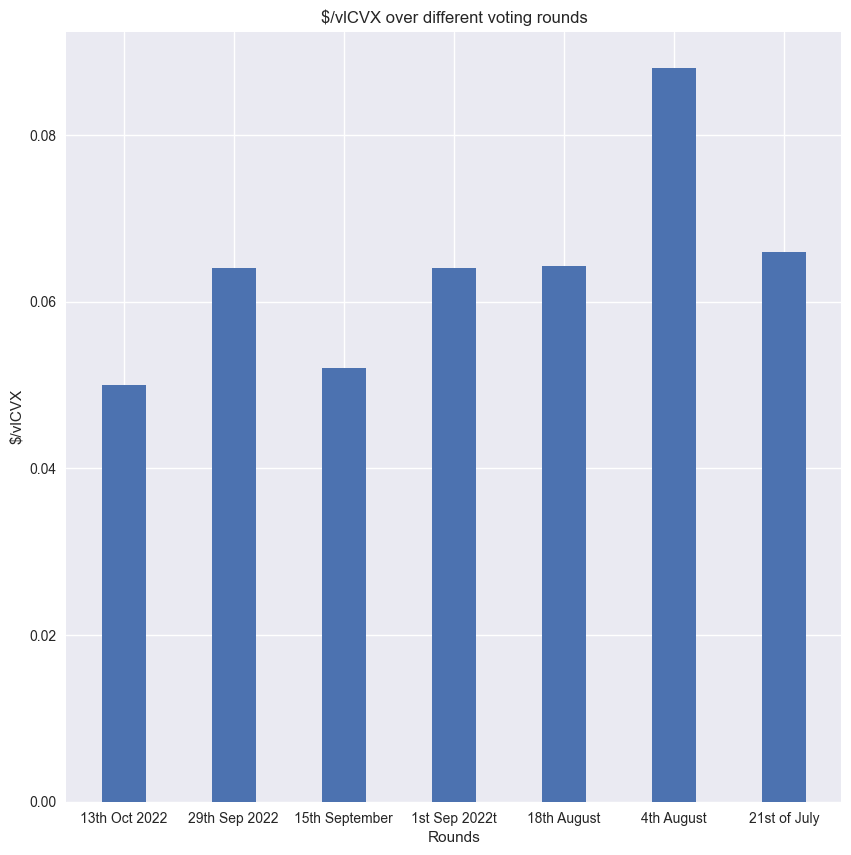

In [2]:
rounds = [dataset[0] for dataset in data_rows]
bvecvxs = [float(dataset[6]) for dataset in data_rows]

fig = plt.figure(figsize=(10, 10))

# creating the bar plot
plt.bar(rounds, bvecvxs, width=0.4)

plt.xlabel("Rounds")
plt.ylabel("$/vlCVX")
plt.title("$/vlCVX over different voting rounds")
plt.show()

## Overall bribes harvested in $


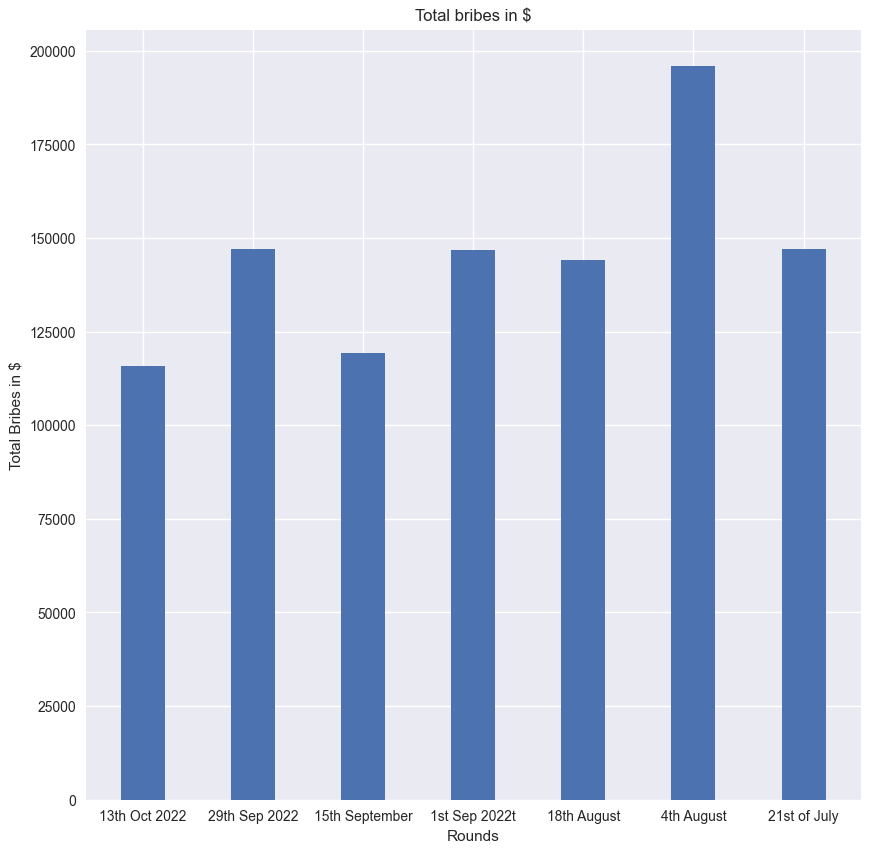

In [3]:
import matplotlib.pyplot as plt

rounds = [dataset[0] for dataset in data_rows]
total_bribes = [float(dataset[1] + dataset[2]) for dataset in data_rows]

fig_total = plt.figure(figsize=(10, 10))

# creating the bar plot
plt.bar(rounds, total_bribes, width=0.4)

plt.xlabel("Rounds")
plt.ylabel("Total Bribes in $")
plt.title("Total bribes in $")
plt.show()